# RNA-seq Cell-Line Project
## Gene Ontology

### Setting up 
**Calling the necessary libraries:**

In [2]:
suppressMessages(suppressWarnings(library(readr)))
suppressMessages(suppressWarnings(library(gprofiler2)))
suppressMessages(suppressWarnings(library(ggplot2)))
suppressMessages(suppressWarnings(library(dplyr)))
suppressMessages(suppressWarnings(library(forcats)))
suppressMessages(suppressWarnings(library(stringr)))

**Calling the files:**

In [3]:
df <- read.delim("/home5/attilio/Joyce/cell_line_project/plots/gene_ids_sorted_TPM.tsv", sep = " ")
gene_list  <- df$id
#print(gene_list)

**Start running commands:**

In [4]:
GO_cell_line  <- gost(gene_list, organism = "rprolixus")# as_short_link = TRUE)

In [8]:
nrow(GO_cell_line$result)
head(GO_cell_line$result)

[1] 283

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,TRUE,5.041761e-40,1394,4192,1165,0.27791031,0.8357245,GO:0009059,GO:BP,macromolecule biosynthetic process,6034,3235,"GO:0009058, GO:0043170"
2,query_1,TRUE,2.739195e-38,1256,4192,1057,0.25214695,0.8415605,GO:0010467,GO:BP,gene expression,6034,4160,GO:0009059
3,query_1,TRUE,1.799501e-36,1767,4192,1433,0.34184160,0.8109791,GO:0009058,GO:BP,biosynthetic process,6034,3234,GO:0008152
4,query_1,TRUE,1.776550e-28,769,4192,663,0.15815840,0.8621586,GO:0071840,GO:BP,cellular component organization or biogenesis,6034,16940,GO:0009987
5,query_1,TRUE,5.770105e-24,324,4192,301,0.07180344,0.9290123,GO:0006396,GO:BP,RNA processing,6034,2157,"GO:0010467, GO:0032774, GO:0044238"
6,query_1,TRUE,3.774141e-22,3558,4192,2651,0.63239504,0.7450815,GO:0008152,GO:BP,metabolic process,6034,3125,GO:0009987


In order to filter out broad terms, we'll use *term size*

**Term size** refers to the number of genes associated with a given GO term

In [9]:
result_table <- (GO_cell_line$result)
#head(result_table)

df_t <- result_table %>% 
        filter(term_size < 1000) %>% 
        mutate(source = str_remove(source, "^GO:")) %>%
                 slice_max(order_by = -log(p_value), n = 30)

head(df_t)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,TRUE,1.163516e-28,267,3834,258,0.06729264,0.9662921,GO:0140513,CC,nuclear protein-containing complex,5488,3504,"GO:0005634, GO:0032991"
2,query_1,TRUE,1.776550e-28,769,4192,663,0.15815840,0.8621586,GO:0071840,BP,cellular component organization or biogenesis,6034,16940,GO:0009987
3,query_1,TRUE,3.978043e-28,256,3834,248,0.06468440,0.9687500,GO:1990904,CC,ribonucleoprotein complex,5488,4007,GO:0032991
4,query_1,TRUE,1.300348e-25,411,5243,365,0.06961663,0.8880779,GO:0003723,MF,RNA binding,7937,343,GO:0003676
5,query_1,TRUE,8.597224e-25,248,3834,238,0.06207616,0.9596774,GO:0031974,CC,membrane-enclosed lumen,5488,1197,GO:0110165
6,query_1,TRUE,8.597224e-25,248,3834,238,0.06207616,0.9596774,GO:0043233,CC,organelle lumen,5488,1851,"GO:0031974, GO:0043226"


**Intersection Size**: This refers to the number of genes in your input query that are annotated to a particular term. Essentially, it shows how many of your input genes are associated with the specific biological process, pathway, or other category being analyzed1.

**Recall**: This is a measure of how well the input query covers the genes annotated to a specific term. It is calculated as the ratio of the intersection size to the total number of genes annotated to that term. In other words, it indicates the proportion of relevant genes from the term that are present in your input list2.

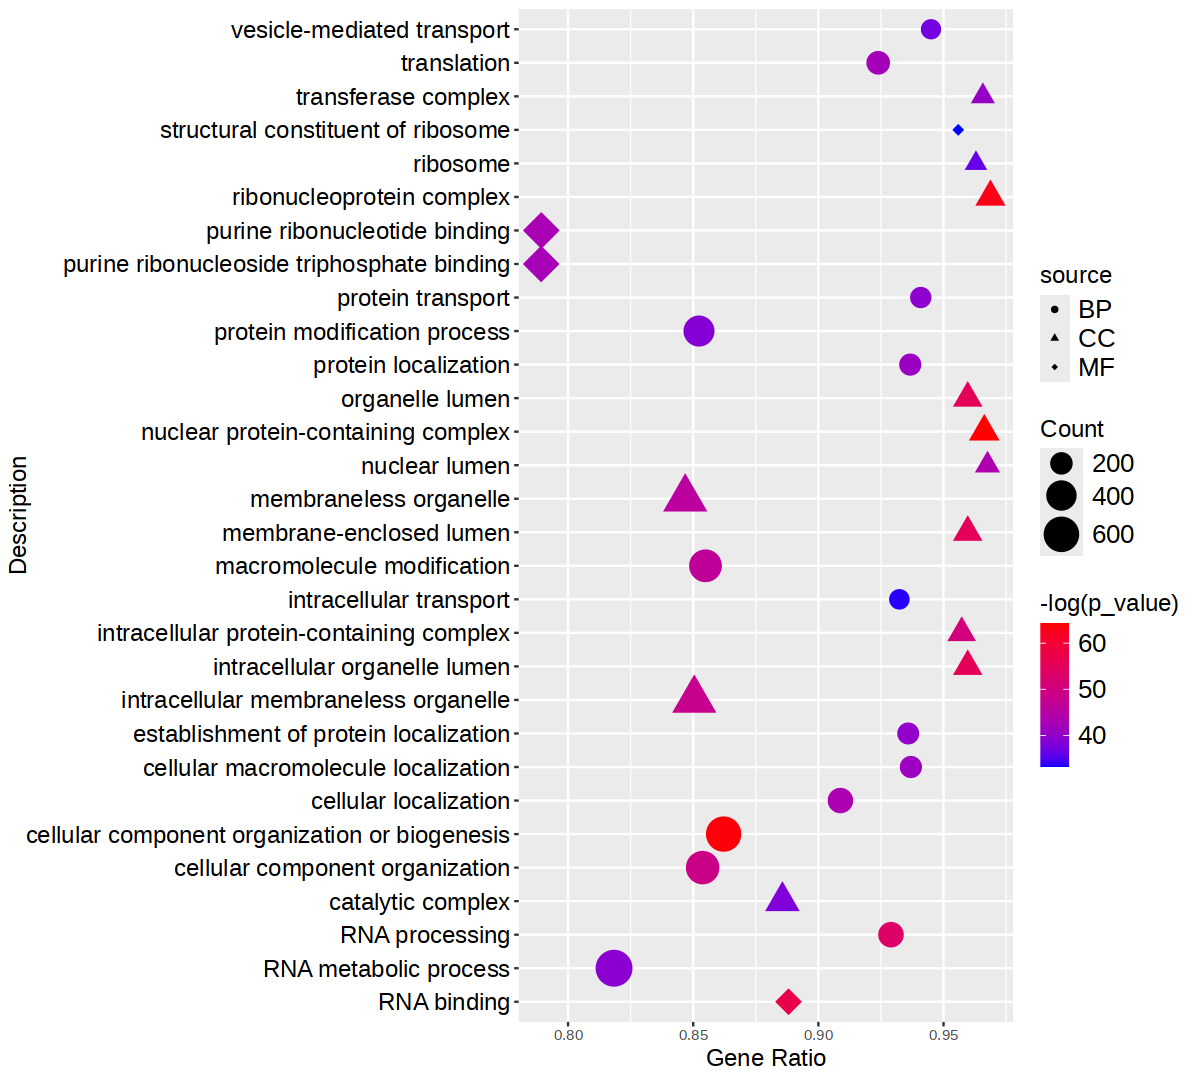

In [11]:
options(repr.plot.width = 10, repr.plot.height = 9)

go_plot <- ggplot(df_t, aes(x = recall, y = term_name)) +
    geom_point(aes(color = -log(p_value), size = intersection_size, shape = source)) +
    scale_color_gradient(low = "blue", high = "red") +
    scale_shape_manual(values = c("BP" = 16, "CC" = 17, "MF" = 18)) +  
    labs(x = "Gene Ratio", y = "Description", color = "-log(p_value)", size = "Count") +
    scale_size(range = c(3, 10)) +
#    theme_minimal() +
    theme(
        axis.text.y = element_text(size = 14, color = "black"),
        axis.title.y = element_text(size = 14),                 
        axis.title.x = element_text(size = 14),                   
        legend.title = element_text(size = 14),                   
        legend.text = element_text(size = 15) 
    )
print(go_plot)
ggsave("go_plot.png", plot = go_plot, width = 10, height = 9, dpi = 100)

In [14]:
df_t
#write.csv(df_t, "30_GO.csv", row.names = FALSE)

query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
query_1,TRUE,1.163516e-28,267,3834,258,0.06729264,0.9662921,GO:0140513,CC,nuclear protein-containing complex,5488,3504,"GO:0005634, GO:0032991"
query_1,TRUE,1.776550e-28,769,4192,663,0.15815840,0.8621586,GO:0071840,BP,cellular component organization or biogenesis,6034,16940,GO:0009987
query_1,TRUE,3.978043e-28,256,3834,248,0.06468440,0.9687500,GO:1990904,CC,ribonucleoprotein complex,5488,4007,GO:0032991
query_1,TRUE,1.300348e-25,411,5243,365,0.06961663,0.8880779,GO:0003723,MF,RNA binding,7937,343,GO:0003676
query_1,TRUE,8.597224e-25,248,3834,238,0.06207616,0.9596774,GO:0031974,CC,membrane-enclosed lumen,5488,1197,GO:0110165
query_1,TRUE,8.597224e-25,248,3834,238,0.06207616,0.9596774,GO:0043233,CC,organelle lumen,5488,1851,"GO:0031974, GO:0043226"
query_1,TRUE,8.597224e-25,248,3834,238,0.06207616,0.9596774,GO:0070013,CC,intracellular organelle lumen,5488,2344,"GO:0043229, GO:0043233"
query_1,TRUE,5.770105e-24,324,4192,301,0.07180344,0.9290123,GO:0006396,BP,RNA processing,6034,2157,"GO:0010467, GO:0032774, GO:0044238"
query_1,TRUE,9.229811e-23,234,3834,224,0.05842462,0.9572650,GO:0140535,CC,intracellular protein-containing complex,5488,3507,GO:0032991


In [16]:
df_teste <- df_t %>%
  mutate(across(where(is.list), ~ sapply(., paste, collapse = ", ")))
write.table(df_teste, "30_GO.csv", row.names = FALSE, col.names = TRUE, sep = ",", dec = ".", qmethod = "double")


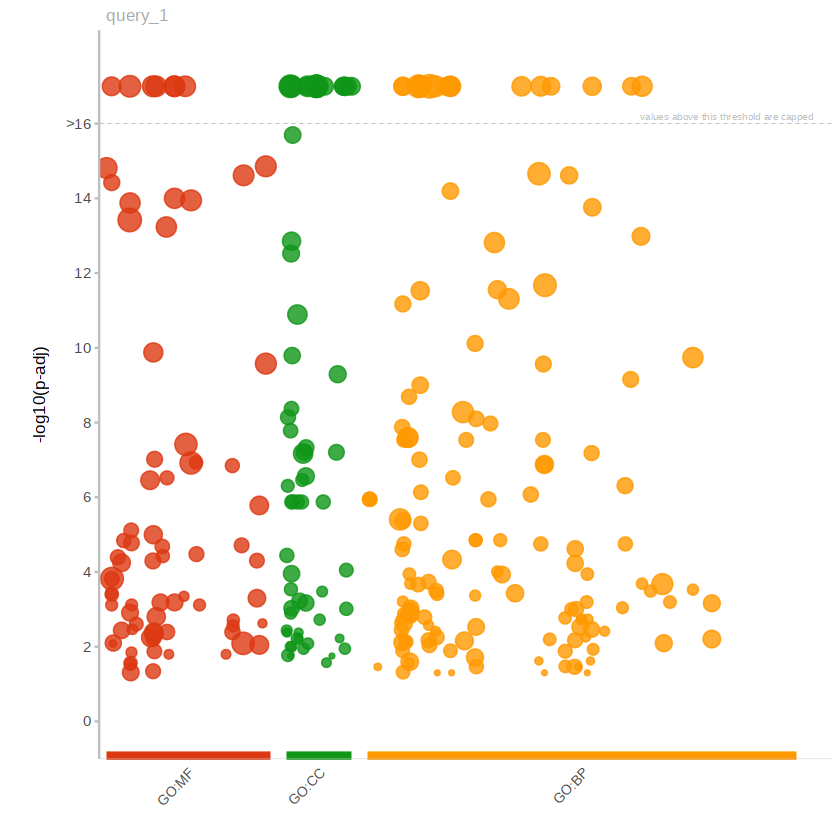

In [7]:
gostplot(GO_cell_line, interactive = FALSE)